# Data Creation

In [1]:
import pandas as pd
import random
from datetime import datetime, timedelta

random.seed(42)

rows = []

event_types = ["Wedding","Engagement","Reception","Birthday","Corporate"]
months = list(range(1,13))

start_date = datetime(2023,1,1)

for i in range(200):
    date = start_date + timedelta(days=random.randint(0,1000))
    month = date.strftime("%b")

    guests = random.randint(500,1500)
    plate_price = random.choice([500,800,1200,1500,2000])

    food_billing = guests * plate_price
    decor_billing = random.randint(100000,800000)
    venue_rent = random.randint(100000,200000)

    food_profit = int(food_billing * random.uniform(0.2,0.3))
    decor_profit = int(decor_billing * random.uniform(0.2,0.35))

    total_net = venue_rent + food_profit + decor_profit

    rows.append([
        date.strftime("%Y-%m-%d"),
        random.choice(event_types),
        guests,
        plate_price,
        food_billing,
        decor_billing,
        venue_rent,
        food_profit,
        decor_profit,
        total_net,
        month
    ])

columns = [
    "Date","Event_Type","Guests","Food_Plate_Price","Food_Billing",
    "Decor_Billing","Venue_Rent","Food_Profit","Decor_Profit",
    "Total_Net_Revenue","Month"
]

df = pd.DataFrame(rows, columns=columns)

df.to_csv("adorna_events.csv", index=False)

df.head()


,Date,Event_Type,Guests,Food_Plate_Price,Food_Billing,Decor_Billing,Venue_Rent,Food_Profit,Decor_Profit,Total_Net_Revenue,Month
0,2024-10-16,Corporate,614,500,307000,388389,132098,68252,120583,320933,Oct
1,2023-03-31,Corporate,1104,1500,1656000,133326,103905,346715,31318,481938,Mar
2,2023-01-28,Corporate,1074,800,859200,781453,191924,218661,182130,592715,Jan
3,2023-10-12,Engagement,1328,500,664000,267414,191506,160861,64628,416995,Oct
4,2025-09-07,Reception,1281,1200,1537200,207175,112156,365842,52590,530588,Sep


In [2]:
len(df)


200

# Data Cleaning

In [3]:
df.isnull().sum()


,0
Date,0
Event_Type,0
Guests,0
Food_Plate_Price,0
Food_Billing,0
Decor_Billing,0
Venue_Rent,0
Food_Profit,0
Decor_Profit,0
Total_Net_Revenue,0


In [4]:
df["Date"] = pd.to_datetime(df["Date"])


In [5]:
df["Year"] = df["Date"].dt.year


In [6]:
df["Month_Num"] = df["Date"].dt.month


In [7]:
df.dtypes


,0
Date,datetime64[ns]
Event_Type,object
Guests,int64
Food_Plate_Price,int64
Food_Billing,int64
Decor_Billing,int64
Venue_Rent,int64
Food_Profit,int64
Decor_Profit,int64
Total_Net_Revenue,int64


In [8]:
df.head()


,Date,Event_Type,Guests,Food_Plate_Price,Food_Billing,Decor_Billing,Venue_Rent,Food_Profit,Decor_Profit,Total_Net_Revenue,Month,Year,Month_Num
0,2024-10-16,Corporate,614,500,307000,388389,132098,68252,120583,320933,Oct,2024,10
1,2023-03-31,Corporate,1104,1500,1656000,133326,103905,346715,31318,481938,Mar,2023,3
2,2023-01-28,Corporate,1074,800,859200,781453,191924,218661,182130,592715,Jan,2023,1
3,2023-10-12,Engagement,1328,500,664000,267414,191506,160861,64628,416995,Oct,2023,10
4,2025-09-07,Reception,1281,1200,1537200,207175,112156,365842,52590,530588,Sep,2025,9


In [9]:
df.to_csv("adorna_events_cleaned.csv", index=False)


# Exploratory Data Analysis

In [10]:
df.groupby("Month")["Total_Net_Revenue"].mean()


,Total_Net_Revenue
Month,
Apr,598417.750000
Aug,521986.933333
Dec,587928.411765
Feb,560821.083333
Jan,587561.937500
Jul,514878.937500
Jun,582227.238095
Mar,538017.277778
May,534088.476190


In [11]:
df.groupby("Event_Type")["Total_Net_Revenue"].mean()


,Total_Net_Revenue
Event_Type,
Birthday,508556.400000
Corporate,551111.267857
Engagement,561179.028571
Reception,589182.209302
Wedding,541949.000000


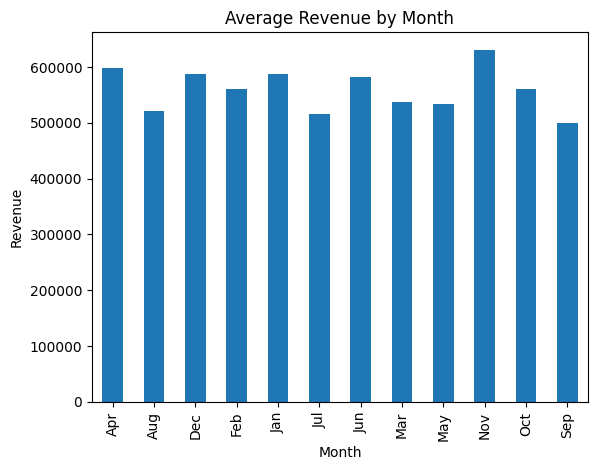

In [12]:
import matplotlib.pyplot as plt

df.groupby("Month")["Total_Net_Revenue"].mean().plot(kind="bar")
plt.title("Average Revenue by Month")
plt.ylabel("Revenue")
plt.show()


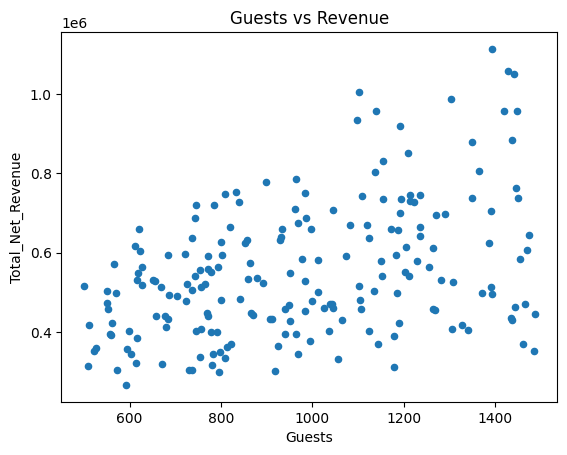

In [13]:
df.plot(x="Guests", y="Total_Net_Revenue", kind="scatter")
plt.title("Guests vs Revenue")
plt.show()


In [14]:
df[["Guests","Food_Plate_Price","Decor_Billing","Venue_Rent","Total_Net_Revenue"]].corr()


,Guests,Food_Plate_Price,Decor_Billing,Venue_Rent,Total_Net_Revenue
Guests,1.000000,-0.085428,-0.030395,0.040938,0.419674
Food_Plate_Price,-0.085428,1.000000,-0.004571,0.038393,0.727596
Decor_Billing,-0.030395,-0.004571,1.000000,-0.040640,0.290717
Venue_Rent,0.040938,0.038393,-0.040640,1.000000,0.194147
Total_Net_Revenue,0.419674,0.727596,0.290717,0.194147,1.000000


In [15]:
df.groupby("Year")["Total_Net_Revenue"].sum()


,Total_Net_Revenue
Year,
2023,35646707
2024,43404410
2025,31554071


#ERP-Style Reporting

Monthly GL Revenue Report

In [16]:
df.groupby(["Year","Month"])["Total_Net_Revenue"].sum()


Year  Month
2023  Apr      2582995
      Aug      1876890
      Dec      5179194
      Feb      1952175
      Jan      3820956
      Jul       932134
      Jun      2807810
      Mar      3169523
      May      3238287
      Nov      1577636
      Oct      4803826
      Sep      3705281
2024  Apr      1947781
      Aug      3287322
      Dec      4815589
      Feb      4728888
      Jan      1971088
      Jul      4655049
      Jun      6558439
      Mar      4325706
      May      2706318
      Nov      1575769
      Oct      1917738
      Sep      4914723
2025  Apr      2650237
      Aug      2665592
      Feb      6778643
      Jan      3608947
      Jul      2650880
      Jun      2860523
      Mar      2189082
      May      5271253
      Sep      2878914
Name: Total_Net_Revenue, dtype: int64

Event Profitability Report

In [17]:
df.groupby("Event_Type")["Total_Net_Revenue"].sum()


,Total_Net_Revenue
Event_Type,
Birthday,15256692
Corporate,30862231
Engagement,19641266
Reception,25334835
Wedding,19510164


Top Revenue Events

In [18]:
df.sort_values("Total_Net_Revenue", ascending=False).head(10)


,Date,Event_Type,Guests,Food_Plate_Price,Food_Billing,Decor_Billing,Venue_Rent,Food_Profit,Decor_Profit,Total_Net_Revenue,Month,Year,Month_Num
24,2024-06-24,Engagement,1393,2000,2786000,543692,127760,815995,170333,1114088,Jun,2024,6
72,2025-04-30,Reception,1428,2000,2856000,567574,120861,783587,153926,1058374,Apr,2025,4
93,2025-04-07,Reception,1441,2000,2882000,606983,160931,701932,187954,1050817,Apr,2025,4
132,2025-05-07,Birthday,1101,2000,2202000,791998,164178,630930,211449,1006557,May,2025,5
64,2024-03-16,Engagement,1304,2000,2608000,736130,185813,605642,196007,987462,Mar,2024,3
175,2023-10-09,Corporate,1139,2000,2278000,674993,193343,529677,235703,958723,Oct,2023,10
14,2024-03-14,Corporate,1419,2000,2838000,518801,147447,629843,181388,958678,Mar,2024,3
60,2024-06-16,Reception,1447,2000,2894000,306606,147739,703617,104960,956316,Jun,2024,6
40,2024-11-04,Reception,1097,2000,2194000,648177,141467,643874,149494,934835,Nov,2024,11
185,2024-09-20,Reception,1191,2000,2382000,127529,179822,697707,41372,918901,Sep,2024,9


Average Revenue Per Event

In [19]:
df["Total_Net_Revenue"].mean()


np.float64(553025.94)

Food vs Decor Contribution

In [20]:
df[["Food_Profit","Decor_Profit"]].sum()


,0
Food_Profit,56792782
Decor_Profit,23637506


Revenue Variance by Year

In [21]:
df.groupby("Year")["Total_Net_Revenue"].agg(["sum","mean","std"])


,sum,mean,std
Year,,,
2023,35646707,524216.279412,153806.031664
2024,43404410,563693.636364,178158.981258
2025,31554071,573710.381818,173723.696952


#ML Revenue Forecasting Model

In [22]:
X = df[["Guests","Food_Plate_Price","Decor_Billing","Venue_Rent","Month_Num"]]
y = df["Total_Net_Revenue"]


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [25]:
model.score(X_test, y_test)


0.893561531897436

In [26]:
predictions = model.predict(X_test)
predictions[:5]


array([691970.8 , 319516.3 , 661443.41, 600184.95, 475362.36])

Compare actual vs predicted

In [27]:
import pandas as pd

pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": predictions
}).head()


,Actual,Predicted
0,636920,691970.80
1,266472,319516.30
2,658786,661443.41
3,541046,600184.95
4,435493,475362.36


# Feature Importance + Business Insights

In [28]:
import pandas as pd

importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False)


,0
Food_Plate_Price,0.558848
Guests,0.264526
Decor_Billing,0.106888
Venue_Rent,0.054179
Month_Num,0.015558


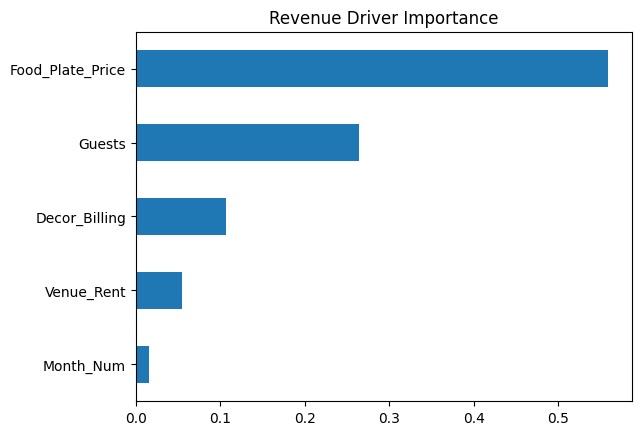

In [29]:
importance.sort_values().plot(kind="barh", title="Revenue Driver Importance")
plt.show()


# Business Insights from Feature Importance
Food plate price is the strongest revenue driver.
→ Premium catering packages have the biggest impact on overall profitability.

Guest count is the second most important factor.
→ Larger weddings significantly increase net revenue even without raising prices.

Decor billing contributes moderately to revenue growth.
→ Upselling themed and premium decor improves margins.

Venue rent has limited impact compared to food and decor.
→ Revenue strategy should focus on services, not just hall pricing.

Month/seasonality has minimal influence in this dataset.
→ Pricing and guest volume matter more than seasonal timing.

# Business Recommendations

Introduce premium food packages to maximize revenue per guest.

Bundle decor + catering offers for higher profit.

Target marketing toward large-guest weddings.

Use guest count and food pricing as primary forecasting inputs.

In [30]:
new_event = [[900, 1200, 500000, 150000, 6]]
model.predict(new_event)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([592592.8])

# Forecasting Visualization + Final Report Summary

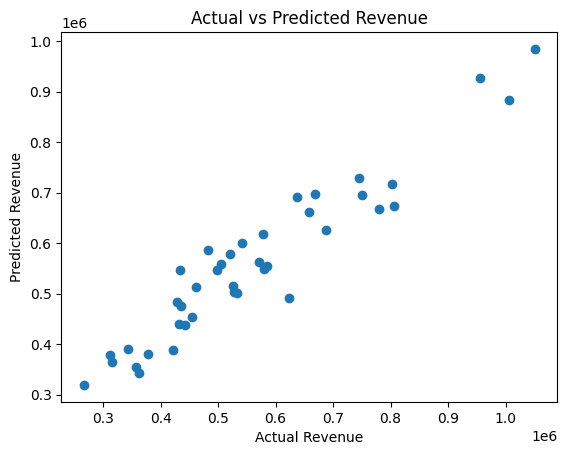

In [31]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()


In [32]:
forecast_df = pd.DataFrame({
    "Actual_Revenue": y_test.values,
    "Predicted_Revenue": predictions
})

forecast_df.head()


,Actual_Revenue,Predicted_Revenue
0,636920,691970.80
1,266472,319516.30
2,658786,661443.41
3,541046,600184.95
4,435493,475362.36


In [33]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, predictions)


48619.76875

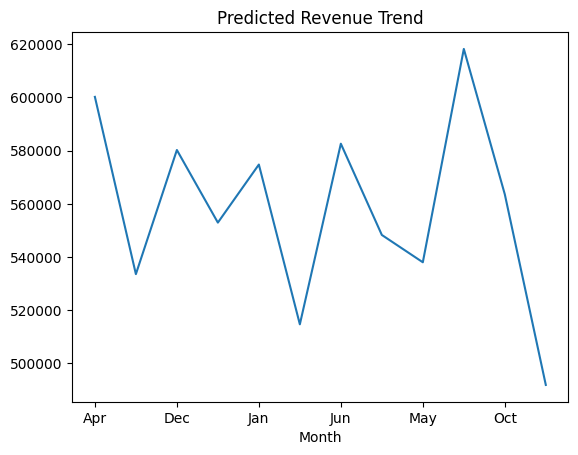

In [34]:
df["Predicted_Revenue"] = model.predict(X)

df.groupby("Month")["Predicted_Revenue"].mean().plot(kind="line", title="Predicted Revenue Trend")
plt.show()


#ERP POSTING & REPORTING

Chart of Accounts

In [35]:
chart_of_accounts = {
    "4000": "Venue Revenue",
    "4010": "Food Revenue",
    "4020": "Decor Revenue",
    "5000": "Vendor Expense",
    "6000": "Net Profit"
}


In [36]:
gl_entries = []


In [37]:
for _, row in df.iterrows():

    gl_entries.append(["4000", row["Venue_Rent"], row["Month"], row["Year"]])
    gl_entries.append(["4010", row["Food_Profit"], row["Month"], row["Year"]])
    gl_entries.append(["4020", row["Decor_Profit"], row["Month"], row["Year"]])

    vendor_expense = row["Food_Billing"] * 0.7
    gl_entries.append(["5000", -vendor_expense, row["Month"], row["Year"]])


In [38]:
gl_df = pd.DataFrame(
    gl_entries,
    columns=["Account","Amount","Month","Year"]
)


In [39]:
gl_df.groupby(["Account"])["Amount"].sum()


,Amount
Account,
4000,30174900.0
4010,56792782.0
4020,23637506.0
5000,-158726120.0


In [40]:
gl_df.groupby(["Year","Month"])["Amount"].sum()


Year  Month
2023  Apr      -870315.0
      Aug      -450680.0
      Dec     -3128126.0
      Feb      -461775.0
      Jan     -1372974.0
      Jul      -277396.0
      Jun      -832820.0
      Mar     -2025597.0
      May     -1179203.0
      Nov      -741534.0
      Oct     -3041494.0
      Sep     -1312109.0
2024  Apr      -506769.0
      Aug     -1925018.0
      Dec     -2308381.0
      Feb     -1608282.0
      Jan      -758772.0
      Jul     -1630671.0
      Jun     -3241071.0
      Mar     -2765084.0
      May     -1124852.0
      Nov     -1256781.0
      Oct      -714892.0
      Sep      -792797.0
2025  Apr     -2334883.0
      Aug     -1448098.0
      Feb     -2630407.0
      Jan     -1980763.0
      Jul     -1265480.0
      Jun      -951817.0
      Mar      -482888.0
      May     -2173247.0
      Sep      -525956.0
Name: Amount, dtype: float64

In [41]:
gl_df[gl_df["Amount"] > 0].groupby("Account")["Amount"].sum()


,Amount
Account,
4000,30174900.0
4010,56792782.0
4020,23637506.0


In [42]:
budget = gl_df.copy()
budget["Budget_Amount"] = budget["Amount"] * 0.95
budget["Variance"] = budget["Amount"] - budget["Budget_Amount"]


In [43]:
budget.groupby("Account")[["Amount","Budget_Amount","Variance"]].sum()


,Amount,Budget_Amount,Variance
Account,,,
4000,30174900.0,28666155.0,1508745.0
4010,56792782.0,53953142.9,2839639.1
4020,23637506.0,22455630.7,1181875.3
5000,-158726120.0,-150789814.0,-7936306.0


In [44]:
gl_entries = []

for _, r in df.iterrows():
    gl_entries.append(["4000","Venue Revenue", r["Venue_Rent"], r["Month"], r["Year"]])
    gl_entries.append(["4010","Food Revenue", r["Food_Profit"], r["Month"], r["Year"]])
    gl_entries.append(["4020","Decor Revenue", r["Decor_Profit"], r["Month"], r["Year"]])

    vendor_exp = r["Food_Billing"] * 0.7
    gl_entries.append(["5000","Vendor Expense", -vendor_exp, r["Month"], r["Year"]])

gl_df = pd.DataFrame(gl_entries, columns=["Account","Account_Name","Amount","Month","Year"])


In [45]:
gl_df.groupby(["Year","Month"])["Amount"].sum()


Year  Month
2023  Apr      -870315.0
      Aug      -450680.0
      Dec     -3128126.0
      Feb      -461775.0
      Jan     -1372974.0
      Jul      -277396.0
      Jun      -832820.0
      Mar     -2025597.0
      May     -1179203.0
      Nov      -741534.0
      Oct     -3041494.0
      Sep     -1312109.0
2024  Apr      -506769.0
      Aug     -1925018.0
      Dec     -2308381.0
      Feb     -1608282.0
      Jan      -758772.0
      Jul     -1630671.0
      Jun     -3241071.0
      Mar     -2765084.0
      May     -1124852.0
      Nov     -1256781.0
      Oct      -714892.0
      Sep      -792797.0
2025  Apr     -2334883.0
      Aug     -1448098.0
      Feb     -2630407.0
      Jan     -1980763.0
      Jul     -1265480.0
      Jun      -951817.0
      Mar      -482888.0
      May     -2173247.0
      Sep      -525956.0
Name: Amount, dtype: float64

In [46]:
gl_df[gl_df["Amount"]>0].groupby("Account_Name")["Amount"].sum()


,Amount
Account_Name,
Decor Revenue,23637506.0
Food Revenue,56792782.0
Venue Revenue,30174900.0


In [47]:
import random

df["Days_To_Pay"] = [random.randint(5,90) for _ in range(len(df))]

ar_aging = df.groupby(pd.cut(df["Days_To_Pay"], [0,30,60,90]))["Total_Net_Revenue"].sum()
ar_aging


/tmp/ipython-input-2329177410.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ar_aging = df.groupby(pd.cut(df["Days_To_Pay"], [0,30,60,90]))["Total_Net_Revenue"].sum()


,Total_Net_Revenue
Days_To_Pay,
"(0, 30]",29461891
"(30, 60]",30673684
"(60, 90]",50469613


In [48]:
df["Recognized_Revenue"] = df["Total_Net_Revenue"] * 0.8
df["Deferred_Revenue"] = df["Total_Net_Revenue"] * 0.2


In [49]:
df[["Recognized_Revenue","Deferred_Revenue"]].sum()


,0
Recognized_Revenue,88484150.4
Deferred_Revenue,22121037.6


In [50]:
df["Cost_Center"] = df["Event_Type"]

df.groupby("Cost_Center")["Total_Net_Revenue"].sum()


,Total_Net_Revenue
Cost_Center,
Birthday,15256692
Corporate,30862231
Engagement,19641266
Reception,25334835
Wedding,19510164


In [51]:
df["Budget"] = df["Total_Net_Revenue"] * 0.95
df["Variance"] = df["Total_Net_Revenue"] - df["Budget"]

df.groupby("Month")[["Total_Net_Revenue","Budget","Variance"]].sum()


,Total_Net_Revenue,Budget,Variance
Month,,,
Apr,7181013,6821962.35,359050.65
Aug,7829804,7438313.80,391490.20
Dec,9994783,9495043.85,499739.15
Feb,13459706,12786720.70,672985.30
Jan,9400991,8930941.45,470049.55
Jul,8238063,7826159.85,411903.15
Jun,12226772,11615433.40,611338.60
Mar,9684311,9200095.45,484215.55
May,11215858,10655065.10,560792.90
